In [1]:
# Exoplanet Detection using Decision Tree with Row Scaling (No Balancing)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# --- Configuration ---
TRAIN_CSV_PATH = 'exoTrain.csv'
TEST_CSV_PATH = 'exoTest.csv'
RANDOM_STATE = 42

# --- Load Data ---
def load_data(train_path, test_path):
    try:
        df_train = pd.read_csv(train_path)
        df_test = pd.read_csv(test_path)
        print("Data loaded successfully.")
        return df_train, df_test
    except Exception as e:
        print(f"Data loading error: {e}")
        return None, None

In [4]:
# --- Preprocessing ---
def preprocess_and_scale(df_train, df_test):
    X_train_raw = df_train.drop('LABEL', axis=1)
    y_train_raw = df_train['LABEL']
    X_test_raw = df_test.drop('LABEL', axis=1)
    y_test_raw = df_test['LABEL']

    y_train = (y_train_raw - 1).astype(int).values
    y_test = (y_test_raw - 1).astype(int).values

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)

    return X_train_scaled, y_train, X_test_scaled, y_test


In [5]:
# --- Train Decision Tree ---
def train_decision_tree(X_train, y_train):
    print("Training Decision Tree...")
    model = DecisionTreeClassifier(random_state=RANDOM_STATE)
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")
    return model

# --- Evaluation ---
def evaluate_model(model, X_test, y_test, model_name="Decision Tree"):
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["NO exoplanet (0)", "YES exoplanet (1)"]))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO exoplanet (0)", "YES exoplanet (1)"])

    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f'{model_name} Confusion Matrix')
    plt.tight_layout()
    plt.show()

Starting Decision Tree Baseline...
Data loaded successfully.
Training Decision Tree...
Training completed in 14.64 seconds.

--- Evaluating Decision Tree ---

Classification Report:
                   precision    recall  f1-score   support

 NO exoplanet (0)       0.99      0.99      0.99       565
YES exoplanet (1)       0.14      0.20      0.17         5

         accuracy                           0.98       570
        macro avg       0.57      0.59      0.58       570
     weighted avg       0.99      0.98      0.98       570


Confusion Matrix:


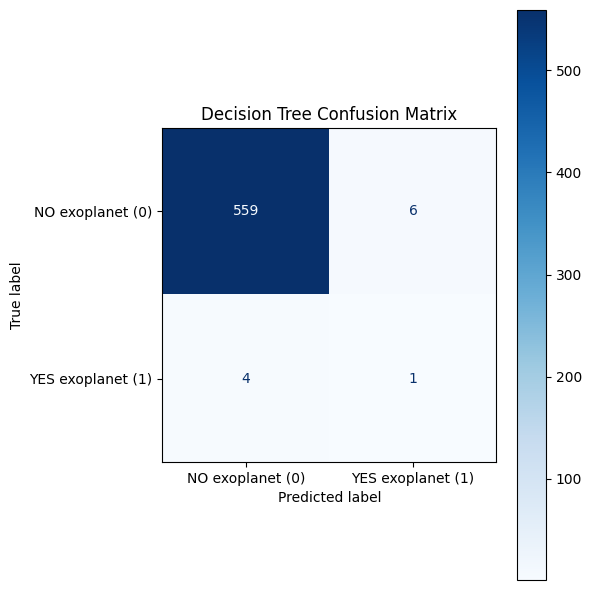

In [6]:
# --- Main ---
if __name__ == "__main__":
    print("Starting Decision Tree Baseline...")
    df_train, df_test = load_data(TRAIN_CSV_PATH, TEST_CSV_PATH)

    if df_train is not None and df_test is not None:
        X_train, y_train, X_test, y_test = preprocess_and_scale(df_train, df_test)
        model = train_decision_tree(X_train, y_train)
        evaluate_model(model, X_test, y_test)
    else:
        print("Script aborted due to data loading errors.")


### Decision Tree with Row Scaling + Class Weighting

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [8]:
# --- Configuration ---
TRAIN_CSV_PATH = 'exoTrain.csv'
TEST_CSV_PATH = 'exoTest.csv'
RANDOM_STATE = 42

# --- Load Data ---
def load_data(train_path, test_path):
    try:
        df_train = pd.read_csv(train_path)
        df_test = pd.read_csv(test_path)
        print("Data loaded successfully.")
        return df_train, df_test
    except Exception as e:
        print(f"Data loading error: {e}")
        return None, None

# --- Preprocessing ---
def preprocess_and_scale(df_train, df_test):
    X_train_raw = df_train.drop('LABEL', axis=1)
    y_train_raw = df_train['LABEL']
    X_test_raw = df_test.drop('LABEL', axis=1)
    y_test_raw = df_test['LABEL']

    y_train = (y_train_raw - 1).astype(int).values
    y_test = (y_test_raw - 1).astype(int).values

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)

    return X_train_scaled, y_train, X_test_scaled, y_test

In [9]:
# --- Train Decision Tree ---
def train_decision_tree_weighted(X_train, y_train):
    print("Training Decision Tree with class_weight='balanced'...")
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")
    return model

In [10]:
# --- Evaluation ---
def evaluate_model(model, X_test, y_test, model_name="Decision Tree + Class Weight"):
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["NO exoplanet (0)", "YES exoplanet (1)"]))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO exoplanet (0)", "YES exoplanet (1)"])

    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f'{model_name} Confusion Matrix')
    plt.tight_layout()
    plt.show()

Starting Decision Tree with Class Weighting...
Data loaded successfully.
Training Decision Tree with class_weight='balanced'...
Training completed in 8.31 seconds.

--- Evaluating Decision Tree + Class Weight ---

Classification Report:
                   precision    recall  f1-score   support

 NO exoplanet (0)       0.99      0.99      0.99       565
YES exoplanet (1)       0.20      0.20      0.20         5

         accuracy                           0.99       570
        macro avg       0.60      0.60      0.60       570
     weighted avg       0.99      0.99      0.99       570


Confusion Matrix:


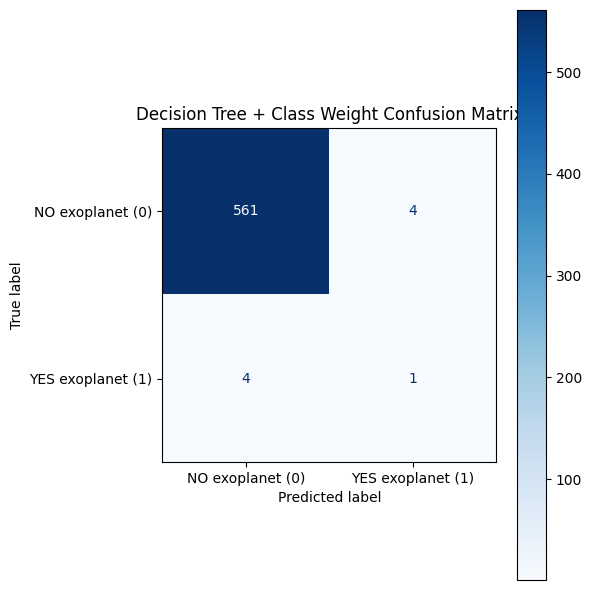

In [11]:
# --- Main ---
if __name__ == "__main__":
    print("Starting Decision Tree with Class Weighting...")
    df_train, df_test = load_data(TRAIN_CSV_PATH, TEST_CSV_PATH)

    if df_train is not None and df_test is not None:
        X_train, y_train, X_test, y_test = preprocess_and_scale(df_train, df_test)
        model = train_decision_tree_weighted(X_train, y_train)
        evaluate_model(model, X_test, y_test)
    else:
        print("Script aborted due to data loading errors.")

### Decision Tree + SMOTE

In [18]:
# Exoplanet Detection using Decision Tree with Row Scaling + SMOTE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [19]:
# --- Configuration ---
TRAIN_CSV_PATH = 'exoTrain.csv'
TEST_CSV_PATH = 'exoTest.csv'
RANDOM_STATE = 42

# --- Load Data ---
def load_data(train_path, test_path):
    try:
        df_train = pd.read_csv(train_path)
        df_test = pd.read_csv(test_path)
        print("Data loaded successfully.")
        return df_train, df_test
    except Exception as e:
        print(f"Data loading error: {e}")
        return None, None

In [20]:
# --- Preprocessing ---
def preprocess_and_scale(df_train, df_test):
    X_train_raw = df_train.drop('LABEL', axis=1)
    y_train_raw = df_train['LABEL']
    X_test_raw = df_test.drop('LABEL', axis=1)
    y_test_raw = df_test['LABEL']

    y_train = (y_train_raw - 1).astype(int).values
    y_test = (y_test_raw - 1).astype(int).values

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)

    return X_train_scaled, y_train, X_test_scaled, y_test, df_test.reset_index(drop=True)

In [21]:
# --- Apply SMOTE ---
def apply_smote(X_train_scaled, y_train):
    print("Applying SMOTE to training data...")
    smote = SMOTE(random_state=RANDOM_STATE)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
    print(f"Training data shape after SMOTE: {X_train_smote.shape}")
    print(f"Training label distribution after SMOTE:\n{pd.Series(y_train_smote).value_counts()}")
    return X_train_smote, y_train_smote

# --- Train Decision Tree ---
def train_decision_tree(X_train, y_train):
    print("Training Decision Tree on SMOTE-balanced data...")
    model = DecisionTreeClassifier(random_state=RANDOM_STATE)
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")
    return model

In [22]:
# --- Evaluation ---
def evaluate_model(model, X_test, y_test, df_test_raw, model_name="Decision Tree + SMOTE"):
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["NO exoplanet (0)", "YES exoplanet (1)"]))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO exoplanet (0)", "YES exoplanet (1)"])

    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f'{model_name} Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # --- Visualize False Negatives ---
    print("\nPlotting False Negatives (Actual=1, Predicted=0)...")
    false_negatives = np.where((y_test == 1) & (y_pred == 0))[0]
    for i in false_negatives[:2]:  # limit to first 2
        plot_light_curve(df_test_raw.iloc[i], i)

In [23]:
# --- Plot Light Curve ---
def plot_light_curve(row, index):
    flux_values = row.drop('LABEL').values
    plt.figure(figsize=(10, 4))
    plt.plot(flux_values, color='black')
    plt.title(f"Flux Curve for False Negative Sample #{index}")
    plt.xlabel("Time")
    plt.ylabel("Flux")
    plt.grid(True)
    plt.show()

Starting Decision Tree with SMOTE...
Data loaded successfully.
Applying SMOTE to training data...


/Users/jvmedhana/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Training data shape after SMOTE: (10100, 3197)
Training label distribution after SMOTE:
1    5050
0    5050
Name: count, dtype: int64
Training Decision Tree on SMOTE-balanced data...
Training completed in 63.16 seconds.

--- Evaluating Decision Tree + SMOTE ---

Classification Report:
                   precision    recall  f1-score   support

 NO exoplanet (0)       0.99      0.98      0.98       565
YES exoplanet (1)       0.07      0.20      0.11         5

         accuracy                           0.97       570
        macro avg       0.53      0.59      0.55       570
     weighted avg       0.98      0.97      0.98       570


Confusion Matrix:


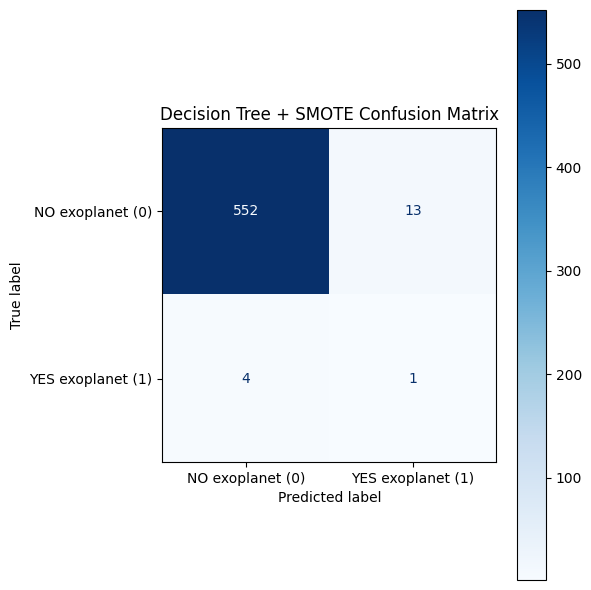


Plotting False Negatives (Actual=1, Predicted=0)...


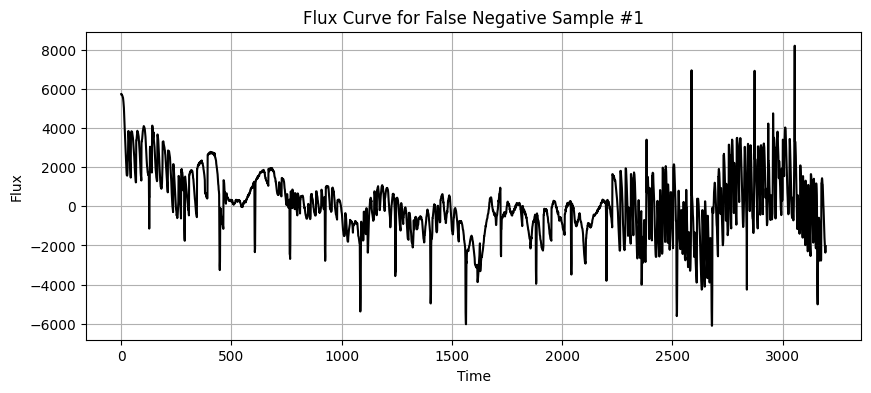

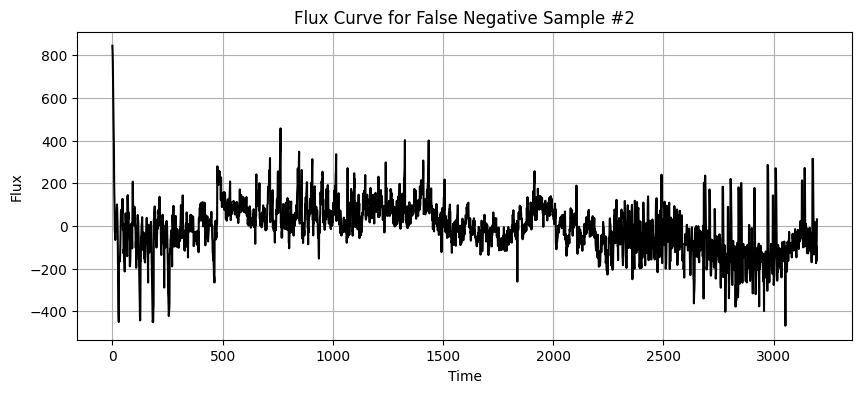

In [24]:
# --- Main ---
if __name__ == "__main__":
    print("Starting Decision Tree with SMOTE...")
    df_train, df_test = load_data(TRAIN_CSV_PATH, TEST_CSV_PATH)

    if df_train is not None and df_test is not None:
        X_train, y_train, X_test, y_test, df_test_raw = preprocess_and_scale(df_train, df_test)
        X_train_smote, y_train_smote = apply_smote(X_train, y_train)
        model = train_decision_tree(X_train_smote, y_train_smote)
        evaluate_model(model, X_test, y_test, df_test_raw)
    else:
        print("Script aborted due to data loading errors.")